In [1]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

/home/dongju/anaconda3/envs/autoenocoder/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 하이퍼 파라미터(배치, 에폭, 옵티마이저, 손실 등!)

In [2]:
HP = {
    'learning_rate':0.000001,
    'batch_size':32, 
    'epoch':50,
    'latent_size':512,
}

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 PyTorch 텐서로 변환
])

train_dataset = datasets.STL10(root='./data', split='train', download=True, transform = transform)
test_dataset = datasets.STL10(root='./data', split='test', download=True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


#### 데이터 로더 만들기

In [4]:
train_loader = DataLoader(train_dataset, batch_size=HP['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

In [50]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_size=HP['latent_size']):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(96*96*3, 4096),
            nn.ReLU(),
            nn.Linear(4096, 1024),
            nn.ReLU(),
            nn.Linear(1024, latent_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 1024),
            nn.ReLU(),
            nn.Linear(1024, 4096),
            nn.ReLU(),
            nn.Linear(4096, 96*96*3),
            nn.ReLU(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        # encoder 의 output
        latent_vector = self.encoder(x)
        output = self.decoder(latent_vector)
        return output, latent_vector

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [52]:
model = AutoEncoder().to(device)
# 데이터 병렬처리
# model = AutoEncoder()
# model = nn.DataParallel(model)
# model.to(device)

optimizer = optim.Adam(model.parameters(), lr = HP['learning_rate'])
criterion = nn.MSELoss()

In [53]:
for epoch in range(HP['epoch']):
    for batch, _ in tqdm(train_loader):
        batch = batch.to(device)
        label = batch.view(batch.size(0), -1)
        
        output, _ = model(batch)
        loss = criterion(output, label)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch + 1} / {HP["epoch"]}], Loss : {loss.item():.4f}')
print("Training Complete")

100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [1 / 50], Loss : 0.1451


100%|██████████| 157/157 [00:05<00:00, 26.68it/s]


Epoch [2 / 50], Loss : 0.1493


100%|██████████| 157/157 [00:05<00:00, 26.68it/s]


Epoch [3 / 50], Loss : 0.1262


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [4 / 50], Loss : 0.1060


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [5 / 50], Loss : 0.1280


100%|██████████| 157/157 [00:05<00:00, 26.68it/s]


Epoch [6 / 50], Loss : 0.1266


100%|██████████| 157/157 [00:05<00:00, 26.68it/s]


Epoch [7 / 50], Loss : 0.1198


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [8 / 50], Loss : 0.1289


100%|██████████| 157/157 [00:05<00:00, 26.68it/s]


Epoch [9 / 50], Loss : 0.1071


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [10 / 50], Loss : 0.1106


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [11 / 50], Loss : 0.1013


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [12 / 50], Loss : 0.0857


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [13 / 50], Loss : 0.0879


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [14 / 50], Loss : 0.0922


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [15 / 50], Loss : 0.0986


100%|██████████| 157/157 [00:05<00:00, 26.67it/s]


Epoch [16 / 50], Loss : 0.0832


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [17 / 50], Loss : 0.0804


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [18 / 50], Loss : 0.0849


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [19 / 50], Loss : 0.0815


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [20 / 50], Loss : 0.0705


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [21 / 50], Loss : 0.0763


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [22 / 50], Loss : 0.0953


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [23 / 50], Loss : 0.0870


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [24 / 50], Loss : 0.0656


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [25 / 50], Loss : 0.0759


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [26 / 50], Loss : 0.0878


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [27 / 50], Loss : 0.0732


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [28 / 50], Loss : 0.0688


100%|██████████| 157/157 [00:05<00:00, 26.64it/s]


Epoch [29 / 50], Loss : 0.0744


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [30 / 50], Loss : 0.0729


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [31 / 50], Loss : 0.0614


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [32 / 50], Loss : 0.0559


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [33 / 50], Loss : 0.0646


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [34 / 50], Loss : 0.0597


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [35 / 50], Loss : 0.0639


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [36 / 50], Loss : 0.0562


100%|██████████| 157/157 [00:05<00:00, 26.64it/s]


Epoch [37 / 50], Loss : 0.0699


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [38 / 50], Loss : 0.0528


100%|██████████| 157/157 [00:05<00:00, 26.64it/s]


Epoch [39 / 50], Loss : 0.0611


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [40 / 50], Loss : 0.0571


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [41 / 50], Loss : 0.0723


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [42 / 50], Loss : 0.0630


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [43 / 50], Loss : 0.0593


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [44 / 50], Loss : 0.0624


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [45 / 50], Loss : 0.0492


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [46 / 50], Loss : 0.0485


100%|██████████| 157/157 [00:05<00:00, 26.61it/s]


Epoch [47 / 50], Loss : 0.0633


100%|██████████| 157/157 [00:05<00:00, 26.66it/s]


Epoch [48 / 50], Loss : 0.0723


100%|██████████| 157/157 [00:05<00:00, 26.65it/s]


Epoch [49 / 50], Loss : 0.0552


100%|██████████| 157/157 [00:05<00:00, 26.64it/s]


Epoch [50 / 50], Loss : 0.0617
Training Complete


## 모델 테스팅

In [54]:
dataiter = iter(test_loader)
images, _ = next(dataiter)
images_flattend = images.view(images.size(0), -1).to(device)

In [55]:
output, _ =  model(images_flattend)
output = output.view(output.size(0), 3, 96, 96).detach()

In [56]:
output.shape

torch.Size([10, 3, 96, 96])

## 이미지 결과 시각화

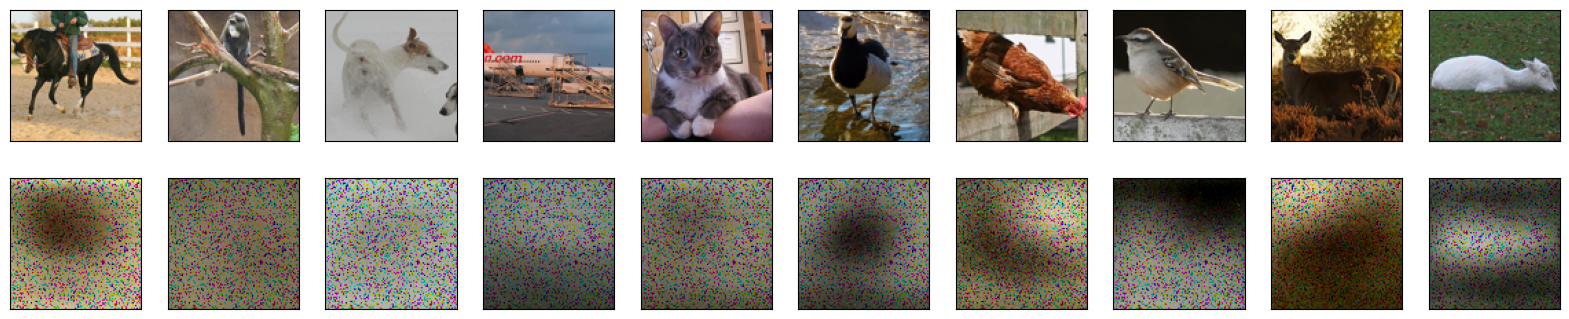

In [57]:
fig, axes = plt.subplots(nrows=2, ncols = 10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([images, output], axes):
    for img, ax in zip(images, row):
        img = img.to('cpu').permute(1,2,0)
        ax.imshow(img.squeeze().numpy())
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

plt.show()